## Homework 2 : Data Processing

#### Due Date: Tuesday June 11, 2020 at 11:59PM EST

We want to study scope, granularity, temporality and faithfulness of a dataset. We will work with criminal records maintained by the [New York City Police Department](https://data.cityofnewyork.us/Public-Safety/NYC-crime/qb7u-rbmr) . Along the way we will get experiece with 

- filling missing values
- grouping records 
- linking records with joins

The questions guide you step-by-step through these steps of data processing. Please post to CampusWire with any questions. 

#### Collaboration Policy

Data science is a collaborative activity. While you may discuss the homework with classmates, you should answer the questions by yourself. If you discuss the assignments with other students, the please **include their names** below.

**Name:** *list name here*

**NetId:** *list netid here*

**Collaborators:** *list names here*

### Rubric



Question | Points
--- | ---
Question 1.1 | 1
Question 1.2 | 1
Question 1.3 | 1
Question 2.1 | 1
Question 2.2 | 1
Question 3.1 | 1
Question 3.2 | 1
Question 3.3 | 1
Question 3.4 | 1
Question 4.1 | 1
Question 4.2 | 1
Question 4.3 | 1
Total | 12

In [1]:
# importing packages 

import pandas as pd
import numpy as np
import os, sys

import matplotlib
import matplotlib.pyplot as plt
import folium
import folium.plugins

# changing some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)

%matplotlib inline
plt.rcParams['figure.figsize'] = (9,7)

In [2]:
# test import of packages 

assert "pandas" in sys.modules and "pd" in locals()
assert "matplotlib" in sys.modules and "plt" in locals()

### Question 0: Loading the Data


We can access the data from the police department in three files.

In [3]:
home = os.environ['HOME']
data_dir = f"{home}/shared/homework-2" 

file_path_locations = f"{data_dir}/nypd_crime_locations.csv"
file_path_time = f"{data_dir}/nypd_crime_time.csv"
file_path_type = f"{data_dir}/nypd_crime_type.csv"

crime_locations = pd.read_csv(file_path_locations)
crime_time = pd.read_csv(file_path_time)
crime_type = pd.read_csv(file_path_type)

The table `crime_locations` contains geographic information about the location of the crime. Note that the table includes both latitude and longitude. 

In [5]:
crime_locations

,Identifier,Borough,Location,Premises,Latitude,Longitude
0,589087198,BROOKLYN,FRONT OF,STREET,40.676760,-73.885861
1,881974251,MANHATTAN,FRONT OF,STREET,40.760580,-73.970380
2,308914932,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,40.646964,-73.963094
3,261567001,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,40.638568,-74.000992
4,172616686,BRONX,FRONT OF,STREET,40.889971,-73.854203
...,...,...,...,...,...,...
314567,595654106,BRONX,NaN,STREET,40.876460,-73.848168
314568,853330237,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,40.657567,-73.954888
314569,742122901,QUEENS,INSIDE,GROCERY/BODEGA,40.687545,-73.758172
314570,960169771,QUEENS,FRONT OF,RESIDENCE - APT. HOUSE,40.727811,-73.748032


The table `crime_type` contains information about the kind of crime. Note that the severity is either `MISDEMEANOR`, `FELONY`, or `VIOLATION`

In [6]:
crime_type

,Identifier,Description,Detailed Description,Severity
0,589087198,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",MISDEMEANOR
1,881974251,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR
2,308914932,BURGLARY,"BURGLARY,RESIDENCE,NIGHT",FELONY
3,261567001,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",FELONY
4,172616686,GRAND LARCENY,"LARCENY,GRAND FROM VEHICLE/MOTORCYCLE",FELONY
...,...,...,...,...
314567,595654106,DANGEROUS DRUGS,"MARIJUANA, POSSESSION 4 & 5",MISDEMEANOR
314568,853330237,ROBBERY,"ROBBERY,RESIDENTIAL COMMON AREA",FELONY
314569,742122901,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",MISDEMEANOR
314570,960169771,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",MISDEMEANOR


The table `crime_time` contains information about the date and time of the crime. Note that the table includes `Start Date`, `Start Time` and `End Date`, `End Time` to indicate a range of possible dates and times for reports without definitive information. 

In [7]:
crime_time

,Identifier,Date of Report,Start Date,Start Time,End Date,End Time
0,589087198,11/20/2015,11/19/2015,22:30:00,NaN,NaN
1,881974251,3/5/2014,3/5/2014,21:40:00,3/5/2014,21:50:00
2,308914932,6/8/2014,6/8/2014,3:00:00,6/8/2014,8:00:00
3,261567001,1/3/2015,1/3/2015,7:00:00,1/3/2015,7:10:00
4,172616686,1/2/2014,1/2/2014,14:30:00,1/2/2014,15:00:00
...,...,...,...,...,...,...
314567,595654106,12/1/2015,12/1/2015,16:50:00,12/1/2015,17:00:00
314568,853330237,1/1/2014,1/1/2014,0:47:00,1/1/2014,0:49:00
314569,742122901,8/11/2015,8/11/2015,11:32:00,NaN,NaN
314570,960169771,11/27/2013,11/25/2013,12:00:00,11/25/2013,13:00:00


### Question 1: Missing Values

Remember that missing values indicate incomplete records. We can try to 

- drop records with entries missing at random 
- fill missing entries with a representative value like mean, median or mode
- impute missing entries by extending the values in related records

We need to check each table for missing values.

#### Question 1.1

The table `crime_type` contains 1114 records with missing values. 

In [8]:
crime_type.isna().any(axis = 1).sum()

1114

However each record has an entry for either `Description` or `Detailed Description`. Note that some records without missing values include the keyword `UNCLASSIFIED`.

How many records are missing an entry in the `Severity` column? 

In [9]:
q11 = ... 

### BEGIN SOLUTION 
q11 = crime_type["Severity"].isna().sum()
### END SOLUTION

In [10]:
# TEST 

assert 0 <= q11

### BEGIN HIDDEN TESTS
assert q11 == 0
### END HIDDEN TESTS

#### Question 1.2

The table `crime_time` contains 61918 records with missing values. 

In [11]:
crime_time.isna().any(axis = 1).sum()

61918

Each record with information about `Start Time` and `Start Date` has missing entries for `End Time` and `End Date`.  has an entry for either `Description` or `Detailed Description`. However some records are missing either `Start Time` or `Start Date`. For crimes like theft, the incident could have a known ending date and time but an unknown starting date and time. 

How many records are missing either `Start Time` or `Start Date`?

In [12]:
missing_time_or_date = (crime_time["Start Time"].isna() | crime_time["Start Date"].isna())

q12 = ... 

### BEGIN SOLUTION 
q12 = missing_time_or_date.sum()
### END SOLUTION

In [13]:
# TEST 

assert 0 <= q12

### BEGIN HIDDEN TESTS
assert q12 == 20
### END HIDDEN TESTS

#### Question 1.3

The table `crime_location` contains 72317 records with missing values. 

In [14]:
crime_locations.isna().any(axis = 1).sum()

72317

While some records lack information about location of the offense, all records indicate the borough of New York City.

In [15]:
crime_locations["Borough"].isna().any()

False

We have 9762 records with information about `Premises` but no information about latitude or longitude. For offenses in moving vehicles, the incident lacks a specific locations. So latitude and longitude are not missing at random for records with `Premises` equal to `TRANSIT - NYC SUBWAY` or `Description` equal to `INTOXICATED & IMPAIRED DRIVING`

How many records are missing both `Latitude` and `Longitude`?

In [16]:
missing_latitude_or_longitude = (crime_locations["Latitude"].isna() & crime_locations["Longitude"].isna())

q1_3 = ... 

### BEGIN SOLUTION 
q1_3 = missing_latitude_or_longitude.sum()
### END SOLUTION

<font color='red' size="4">In Python, we use '|' to represent logical operator 'or' and we use '&' to represent logical operator 'and'. 'Or' returns True if one of the statements is true. 'And' returns True if both statements are true. So, in 1_2, we use '|' and, in 1_3, we use '&'.</font>


In [17]:
# TEST 

assert 0 <= q1_3

### BEGIN HIDDEN TESTS
assert q1_3 == 9819
### END HIDDEN TESTS

### Question 2: Type of Crime

We have two columns containing information about the type of crime in the table `crime_type`. We have 62 different values in `Description` and 338 different values in `Detailed Description`. So the column `Description` is less granular than the column `Detailed Description`.


In [18]:
print(len(crime_type['Description'].unique()))

print(len(crime_type['Detailed Description'].unique()))

62
338


For many records, the entry in `Detailed Description` combines different offenses summarized by the entry in `Description`. We can group the entries in `Detailed Description` by the entries in `Description` to understand the relationship between columns.

In [19]:
def select_number_of_unique_values(dataframe):
    return len(dataframe.unique())

groups = crime_type.groupby(crime_type["Description"]).agg({"Detailed Description" : select_number_of_unique_values})
groups

,Detailed Description
Description,
ABORTION,1
ADMINISTRATIVE CODE,13
AGRICULTURE & MRKTS LAW-UNCLASSIFIED,2
ALCOHOLIC BEVERAGE CONTROL LAW,1
ANTICIPATORY OFFENSES,1
...,...
THEFT-FRAUD,4
UNAUTHORIZED USE OF A VEHICLE,1
UNDER THE INFLUENCE OF DRUGS,1


Which value in `Description` has the largest numbers of different values in `Detailed Description`?

In [20]:
groups = groups.sort_values("Detailed Description")

q2_1 = ... 

### BEGIN SOLUTION 
q2_1 = groups.index[np.argmax(groups.values)]
### END SOLUTION

<font color='red' size="4">'groups' returns a sorted dataframe with 'Description' and the number of 'Detailed Description' in ascending order. We use np.argmax(groups.values) to get the index of the largest value of 'Detailed Description'. Note: No matter we sorted the dataframe or not, np.argmax(groups.values) would return the index of the largest value of 'Detailed Description'.</font>

In [21]:
# TEST 

assert q2_1 in crime_type["Description"].unique()

### BEGIN HIDDEN TESTS
assert q2_1 == groups.index[np.argmax(groups.values)]
### END HIDDEN TESTS

#### Question 2.2

We learn that many values in `Detailed Description` correspond to the same value in `Description`. Can we find multiple values in `Description` that correspond to the same value in `Detailed Description`?

In [22]:
groups = crime_type.groupby(crime_type["Detailed Description"]).agg({"Description" : select_number_of_unique_values})
max_value = groups["Description"].max()

q2_2 = ... 

### BEGIN SOLUTION 
q2_2 = True
### END SOLUTION

In [23]:
# TEST 

assert q2_2 in [True, False]

### BEGIN HIDDEN TESTS
assert q2_2 == True
### END HIDDEN TESTS

### Question 3: Date and Time of Offense

We will study the distribution of months throughout the year and the distribution of hours throughout the day.

#### Question 3.1

Among the 314572 records in the table `crime_time`, we find 20 records with a missing value in `Start Date`. Since we want to make a chart showing the distribution of months throughout the year, we can drop these records without impacting the chart.


In [24]:
crime_time_start_date = crime_time[["Start Date"]].dropna()
crime_time_start_date

,Start Date
0,11/19/2015
1,3/5/2014
2,6/8/2014
3,1/3/2015
4,1/2/2014
...,...
314567,12/1/2015
314568,1/1/2014
314569,8/11/2015
314570,11/25/2013


We need to extract the month from the date. 

In [25]:
def extract_month(entry):
    entry = str(entry)
    return entry.split("/")[0] 

crime_time_start_date["Month"] = crime_time_start_date["Start Date"].apply(extract_month)
crime_time_start_date

,Start Date,Month
0,11/19/2015,11
1,3/5/2014,3
2,6/8/2014,6
3,1/3/2015,1
4,1/2/2014,1
...,...,...
314567,12/1/2015,12
314568,1/1/2014,1
314569,8/11/2015,8
314570,11/25/2013,11


Since the numbers are not informative, we should replace the numbers with strings. Generate a dictionary with 

- keys : the strings ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
- values : the strings ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

Call the dictionary `month_mapper`.

In [26]:
month_mapper = ...

### BEGIN SOLUTION 
month_mapper = dict(zip(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
                    ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]))
### END SOLUTION

<font color='red' size="4">In Python 3, zip now returns a lazy iterator, and this is now the most performant approach.

dict(zip(keys, values)) does require the one-time global lookup each for dict and zip, but it doesn't form any unnecessary intermediate data-structures or have to deal with local lookups in function application.</font>

In [27]:
# TEST

assert set(month_mapper.values()) == {"January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"}

### BEGIN HIDDEN TESTS
assert set(month_mapper.keys()) == set(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
### END HIDDEN TESTS

Now we can add informative entries to the `Month` columns.

In [28]:
crime_time_start_date["Month"] = crime_time_start_date["Month"].replace(month_mapper) 
crime_time_start_date

,Start Date,Month
0,11/19/2015,November
1,3/5/2014,March
2,6/8/2014,June
3,1/3/2015,January
4,1/2/2014,January
...,...,...
314567,12/1/2015,December
314568,1/1/2014,January
314569,8/11/2015,August
314570,11/25/2013,November


#### Question 3.2


Use the method `value_counts` to enumerate the records for each month `January` through `December`.

In [29]:
number_of_months = ...

### BEGIN SOLUTION
number_of_months = crime_time_start_date["Month"].value_counts()
### END SOLUTION

<font color='red' size="4">Pandas Index.value_counts() function returns object containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.</font>

Now we can generate a bar-chart.

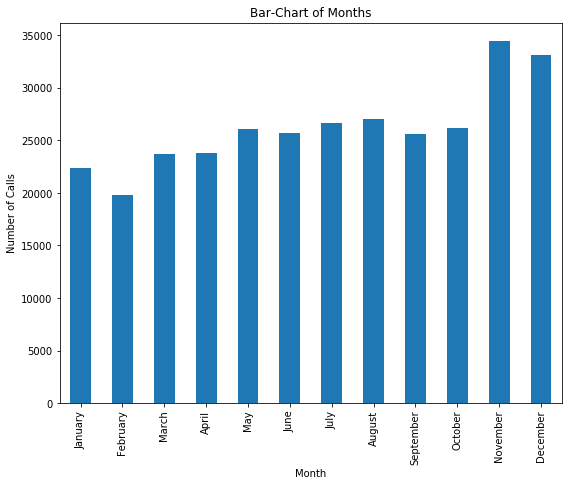

In [30]:
number_of_months = number_of_months[["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]]
number_of_months.plot(kind = "bar")

plt.xlabel("Month")
plt.ylabel("Number of Calls")
plt.title("Bar-Chart of Months");

axis_32 = plt.gca()

In [31]:
# TEST

assert "axis_32" in locals()

### BEGIN HIDDEN TESTS
bars = [rect.get_height() for rect in axis_32.get_children() 
        if isinstance(rect, matplotlib.patches.Rectangle) and rect.get_x() != 0.0
       ]
assert set(bars) == set(crime_time_start_date["Month"].value_counts().values)
### END HIDDEN TESTS

#### Question 3.3

Among the 314572 records in the table `crime_time`, we find 0 records with a missing value in `Start Time`. 

In [32]:
crime_time_start_time = crime_time[["Start Time"]].copy()
crime_time_start_time

,Start Time
0,22:30:00
1,21:40:00
2,3:00:00
3,7:00:00
4,14:30:00
...,...
314567,16:50:00
314568,0:47:00
314569,11:32:00
314570,12:00:00


Use the function `extract_hour` to determine a column `Hour` in the table `crime_time_start_time`. See Question 3.1.

In [33]:
def extract_hour(entry):
    entry = str(entry)
    return entry.split(":")[0] 

crime_time_start_time["Hour"] = ...

### BEGIN SOLUTION
crime_time_start_time["Hour"] = crime_time_start_time["Start Time"].apply(extract_hour)
### END SOLUTION

<font color='red' size="4">Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.</font>



In [34]:
# TEST

assert 'Hour' in crime_time_start_time.columns

### BEGIN HIDDEN TESTS
assert set(crime_time_start_time["Hour"].unique()).issubset(set([str(i) for i in range(24)])) 
### END HIDDEN TESTS

#### Question 3.4

We can generate a box-plot for the distribution of values in the `Hours`. 

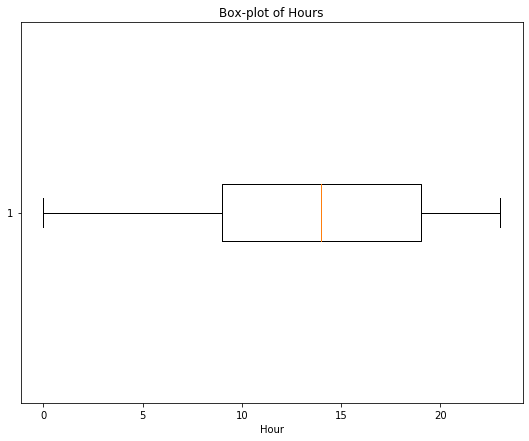

In [35]:
plt.boxplot(crime_time_start_time["Hour"].astype(int), vert = False)
plt.xlabel("Hour")
plt.title("Box-plot of Hours");

__True or False__: We learn that the median value is between 10AM and 3PM.

In [36]:
q34 = ... 

### BEGIN SOLUTION
q34 = True
### END SOLUTION

<font color='red' size="4"> The orange line in this plot represents the median value. </font>

In [37]:
# TEST

assert q34 in [True, False]

### BEGIN HIDDEN TESTS
assert q34 == True
### END HIDDEN TESTS

### Question 4: Location in New York City

We can chart the location of different crimes throughout New York City. However, we need to link records between the tables.

#### Question 4.1 

We `pd.merge` to join the table `crime_locations` and the table `crime_type` on the column `Identifier`. Call the merged table `crime_locations_and_type`.


In [38]:
crime_locations_and_type = ...

### BEGIN SOLUTION
crime_locations_and_type = pd.merge(crime_locations, crime_type, how = "inner", on = "Identifier")
### END SOLUTION

In [39]:
# TEST

assert crime_locations_and_type.shape == (314572, 9) 

### BEGIN HIDDEN TESTS
assert set(crime_locations_and_type.columns) == {'Borough',
 'Description',
 'Detailed Description',
 'Identifier',
 'Latitude',
 'Location',
 'Longitude',
 'Premises',
 'Severity'}
### END HIDDEN TESTS

#### Question 4.2

We will focus on `ROBBERY`. We want to compute a bar-chart showing the number of robberies across the boroughs of New York City.

Filter the table `crime_locations_and_type` to include records where the entry in `Descriptio` equals `ROBBERY`. Call the resulting table `robbery`.

In [40]:
robbery = ...

### BEGIN SOLUTION
robbery = crime_locations_and_type[crime_locations_and_type["Description"] == 'ROBBERY']
### END SOLUTION

Now we can generate a bar-chart.

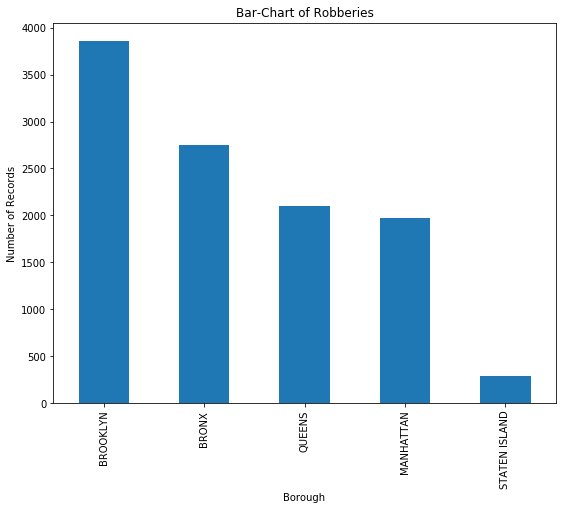

In [41]:
robbery["Borough"].value_counts().plot(kind = "bar")

plt.xlabel("Borough")
plt.ylabel("Number of Records")
plt.title("Bar-Chart of Robberies");

In [ ]:
Which borough has the most robberies

In [43]:
q42 = ... 

### BEGIN SOLUTION
q42 = "BROOKLYN"
### END SOLUTION

In [44]:
# TEST

assert q42 in ['BROOKLYN', 'BRONX', 'QUEENS', 'MANHATTAN', 'STATEN ISLAND']

### BEGIN HIDDEN TESTS
assert q42 == "BROOKLYN"
### END HIDDEN TESTS

#### Question 4.3


We want to generate a [Heat Map](https://en.wikipedia.org/wiki/Heat_map) to show the distribution of robberies across the five boroughs. A heat map is a graphical representation of a table where numbers are translated into colors.

In [45]:
NY_COORDINATES = (40.7, -74.0)
ny_map = folium.Map(location=NY_COORDINATES, zoom_start=15)

display(ny_map)

After we generate a map of New York City, we can add colors to indicate the concentration of robberies. Here we need to specify a latitude and longitude.

In [46]:
locations = robbery[['Latitude', 'Longitude']].astype('float').dropna()

heatmap = folium.plugins.HeatMap(locations.values, radius = 10)
ny_map.add_child(heatmap)
display(ny_map)

__True or False__: The color blue corresponds to low concentration of robberies.

In [47]:
q43 = ... 

### BEGIN SOLUTION
q43 = True
### END SOLUTION

In [48]:
# TEST

assert q43 in [True, False]

### BEGIN HIDDEN TESTS
assert q43 == True
### END HIDDEN TESTS